In [66]:
# Run this cell to set up your notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from pathlib import Path

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
np.set_printoptions(threshold=5) # avoid printing out big matrices
%matplotlib inline

In [173]:
team_data = pd.read_csv("nba_team_stats_00_to_21.csv")
player_data = pd.read_csv("all_seasons.csv") 

In [68]:
player_data

Unnamed: 0        player_name team_abbreviation   age  player_height  \
0               0      Dennis Rodman               CHI  36.0         198.12   
1               1  Dwayne Schintzius               LAC  28.0         215.90   
2               2       Earl Cureton               TOR  39.0         205.74   
3               3        Ed O'Bannon               DAL  24.0         203.20   
4               4        Ed Pinckney               MIA  34.0         205.74   
...           ...                ...               ...   ...            ...   
12300       12300    Markieff Morris               MIA  32.0         205.74   
12301       12301     Markelle Fultz               ORL  24.0         193.04   
12302       12302       Marcus Smart               BOS  28.0         193.04   
12303       12303     Marcus Garrett               MIA  23.0         195.58   
12304       12304       Micah Potter               DET  24.0         208.28   

       player_weight                      college country draft_year  \
0          99.790240  Southeastern Oklahoma State     USA       1986   
1         117.933920                      Florida     USA       1990   
2          95.254320                Detroit Mercy     USA       1979   
3         100.697424                         UCLA     USA       1995   
4         108.862080                    Villanova     USA       1985   
...              ...                          ...     ...        ...   
12300     111.130040                       Kansas     USA       2011   
12301      94.800728                   Washington     USA       2017   
12302      99.790240               Oklahoma State     USA       2014   
12303      92.986360                       Kansas     USA  Undrafted   
12304     112.490816                    Wisconsin     USA  Undrafted   

      draft_round  ...   pts   reb  ast  net_rating  oreb_pct  dreb_pct  \
0               2  ...   5.7  16.1  3.1        16.1     0.186     0.323   
1               1  ...   2.3   1.5  0.3        12.3     0.078     0.151   
2               3  ...   0.8   1.0  0.4        -2.1     0.105     0.102   
3               1  ...   3.7   2.3  0.6        -8.7     0.060     0.149   
4               1  ...   2.4   2.4  0.2       -11.2     0.109     0.179   
...           ...  ...   ...   ...  ...         ...       ...       ...   
12300           1  ...   7.6   2.6  1.4         4.5     0.059     0.089   
12301           1  ...  10.8   2.7  5.5        -5.3     0.010     0.116   
12302           1  ...  12.1   3.8  5.9         9.3     0.018     0.093   
12303   Undrafted  ...   1.1   1.9  0.6         5.8     0.072     0.108   
12304   Undrafted  ...   4.0   3.0  0.0       -56.4     0.095     0.125   

       usg_pct  ts_pct  ast_pct   season  
0        0.100   0.479    0.113  1996-97  
1        0.175   0.430    0.048  1996-97  
2        0.103   0.376    0.148  1996-97  
3        0.167   0.399    0.077  1996-97  
4        0.127   0.611    0.040  1996-97  
...        ...     ...      ...      ...  
12300    0.197   0.547    0.116  2021-22  
12301    0.265   0.517    0.448  2021-22  
12302    0.179   0.540    0.245  2021-22  
12303    0.086   0.280    0.069  2021-22  
12304    0.148   0.505    0.000  2021-22  

[12305 rows x 22 columns]

In [69]:
team_data

teamstatspk                   TEAM  GP   W   L   WIN%   MIN    PTS   FGM  \
0              0           Phoenix Suns  52  42  10  0.808  48.1  112.7  42.7   
1              1  Golden State Warriors  53  40  13  0.755  48.2  110.9  40.4   
2              2      Memphis Grizzlies  55  37  18  0.673  48.3  112.7  42.7   
3              3             Miami Heat  54  34  20  0.630  48.5  108.7  39.3   
4              4          Chicago Bulls  53  33  20  0.623  48.1  111.6  41.6   
..           ...                    ...  ..  ..  ..    ...   ...    ...   ...   
621          621          Atlanta Hawks  82  25  57  0.305  48.1   91.0  35.1   
622          622    Vancouver Grizzlies  82  23  59  0.280  48.2   91.7  35.0   
623          623     Washington Wizards  82  19  63  0.232  48.0   93.2  34.5   
624          624  Golden State Warriors  82  17  65  0.207  48.2   92.5  35.8   
625          625          Chicago Bulls  82  15  67  0.183  48.4   87.6  33.2   

      FGA  ...   REB   AST   TOV   STL  BLK  BLKA    PF   PFD  +/-   SEASON  
0    89.4  ...  46.1  26.5  13.3   8.6  4.3   4.0  19.3  19.3  7.8  2020-21  
1    86.5  ...  46.5  27.5  15.6   9.4  4.9   4.1  20.3  17.7  8.3  2020-21  
2    93.4  ...  48.6  25.1  13.3  10.1  6.4   6.4  19.1  19.0  4.1  2020-21  
3    85.7  ...  44.6  25.9  14.9   7.6  3.3   4.4  20.5  20.0  4.2  2020-21  
4    87.0  ...  43.0  24.5  13.0   7.2  4.6   5.2  18.8  17.8  1.7  2020-21  
..    ...  ...   ...   ...   ...   ...  ...   ...   ...   ...  ...      ...  
621  81.3  ...  42.9  19.0  16.7   7.7  4.7   6.3  22.7   0.1 -5.2  2000-01  
622  79.7  ...  40.5  23.2  15.7   7.1  4.4   5.8  21.1   0.1 -5.7  2000-01  
623  78.7  ...  41.3  20.1  17.0   7.7  4.7   6.2  23.3   0.1 -6.7  2000-01  
624  87.5  ...  45.5  21.8  15.9   9.0  5.0   6.0  21.1   0.1 -9.0  2000-01  
625  78.2  ...  38.9  22.1  15.8   8.2  4.6   5.2  23.2   0.0 -9.1  2000-01  

[626 rows x 29 columns]

In [70]:
team_data_filtered = team_data[["TEAM", "W", "L", "WIN%", "SEASON"]].replace('LA Clippers', 'Los Angeles Clippers')
player_data_filtered = player_data[["player_name", "team_abbreviation", "age", "season"]]

In [71]:
team_data_filtered

TEAM   W   L   WIN%   SEASON
0             Phoenix Suns  42  10  0.808  2020-21
1    Golden State Warriors  40  13  0.755  2020-21
2        Memphis Grizzlies  37  18  0.673  2020-21
3               Miami Heat  34  20  0.630  2020-21
4            Chicago Bulls  33  20  0.623  2020-21
..                     ...  ..  ..    ...      ...
621          Atlanta Hawks  25  57  0.305  2000-01
622    Vancouver Grizzlies  23  59  0.280  2000-01
623     Washington Wizards  19  63  0.232  2000-01
624  Golden State Warriors  17  65  0.207  2000-01
625          Chicago Bulls  15  67  0.183  2000-01

[626 rows x 5 columns]

In [120]:
player_data_filtered.sort_values(by = ["season", "team_abbreviation", "age"])
player_data_filtered[player_data_filtered['team_abbreviation'] == 'CHA']

player_name team_abbreviation   age   season
3510       Emeka Okafor               CHA  22.0  2004-05
3570       Theron Smith               CHA  24.0  2004-05
3573         Tamar Slay               CHA  25.0  2004-05
3638   Bernard Robinson               CHA  24.0  2004-05
3655     Gerald Wallace               CHA  22.0  2004-05
...                 ...               ...   ...      ...
12218         Kai Jones               CHA  21.0  2021-22
12236  Montrezl Harrell               CHA  28.0  2021-22
12242     Miles Bridges               CHA  24.0  2021-22
12257     Nick Richards               CHA  24.0  2021-22
12294     Mason Plumlee               CHA  32.0  2021-22

[288 rows x 4 columns]

In [81]:
team_abbreviations = np.sort(player_data_filtered["team_abbreviation"].unique())
team_names = np.sort(team_data_filtered["TEAM"].unique())
for i in range(len(team_abbreviations)):
    if i == 1 or i == 21:
        temp = team_abbreviations[i]
        team_abbreviations[i] = team_abbreviations[i + 1]
        team_abbreviations[i + 1] = temp
    print(team_abbreviations[i], team_names[i])

ATL Atlanta Hawks
BOS Boston Celtics
BKN Brooklyn Nets
CHA Charlotte Bobcats
CHH Charlotte Hornets
CHI Chicago Bulls
CLE Cleveland Cavaliers
DAL Dallas Mavericks
DEN Denver Nuggets
DET Detroit Pistons
GSW Golden State Warriors
HOU Houston Rockets
IND Indiana Pacers
LAC Los Angeles Clippers
LAL Los Angeles Lakers
MEM Memphis Grizzlies
MIA Miami Heat
MIL Milwaukee Bucks
MIN Minnesota Timberwolves
NJN New Jersey Nets
NOH New Orleans Hornets
NOP New Orleans Pelicans
NOK New Orleans/Oklahoma City Hornets
NYK New York Knicks
OKC Oklahoma City Thunder
ORL Orlando Magic
PHI Philadelphia 76ers
PHX Phoenix Suns
POR Portland Trail Blazers
SAC Sacramento Kings
SAS San Antonio Spurs
SEA Seattle SuperSonics
TOR Toronto Raptors
UTA Utah Jazz
VAN Vancouver Grizzlies
WAS Washington Wizards


In [110]:
team_data_filtered = team_data_filtered.sort_values(by = ["SEASON", "TEAM"], )
team_data_filtered[team_data_filtered["TEAM"] == "Charlotte Hornets"]

TEAM   W   L   WIN%   SEASON
610  Charlotte Hornets  46  36  0.561  2000-01
578  Charlotte Hornets  44  38  0.537  2001-02
201  Charlotte Hornets  33  49  0.402  2014-15
158  Charlotte Hornets  48  34  0.585  2015-16
139  Charlotte Hornets  36  46  0.439  2016-17
109  Charlotte Hornets  36  46  0.439  2017-18
76   Charlotte Hornets  39  43  0.476  2018-19
51   Charlotte Hornets  23  42  0.354  2019-20
15   Charlotte Hornets  28  26  0.519  2020-21

In [83]:
season_list = team_data_filtered["SEASON"].unique()
season_list

array(['2000-01', '2001-02', '2002-03', ..., '2018-19', '2019-20',
       '2020-21'], dtype=object)

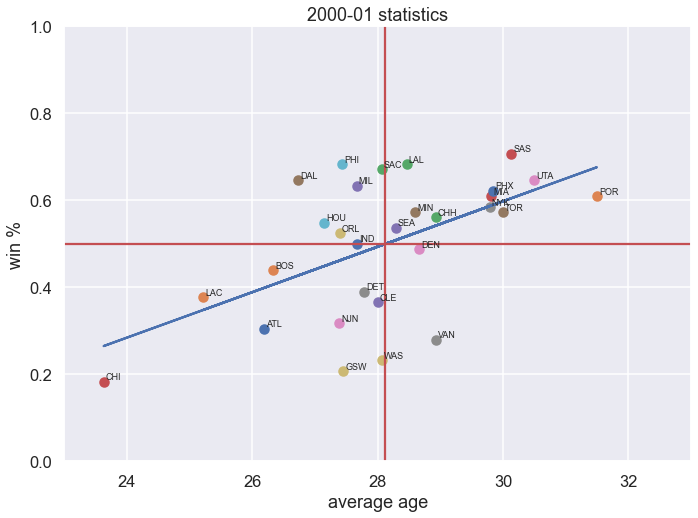

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


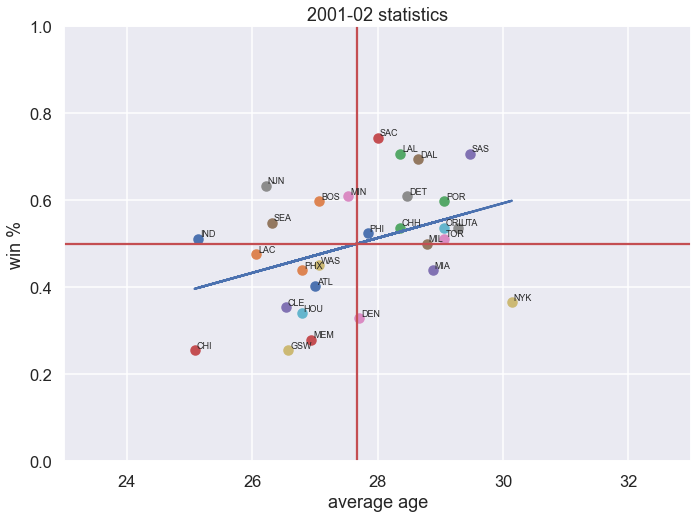

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


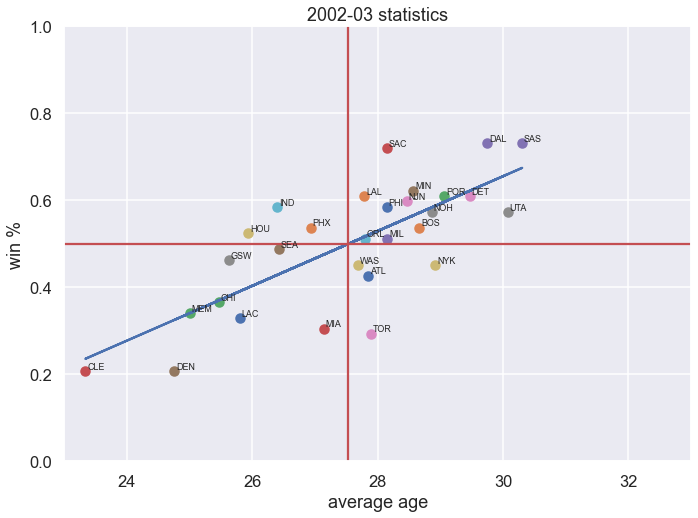

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


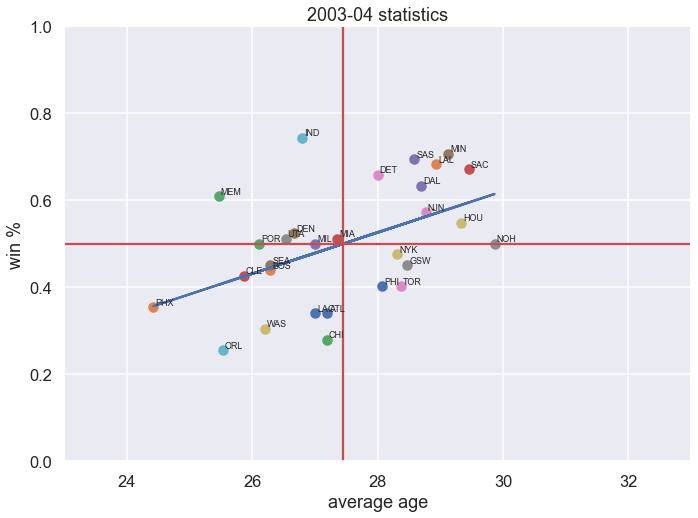

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


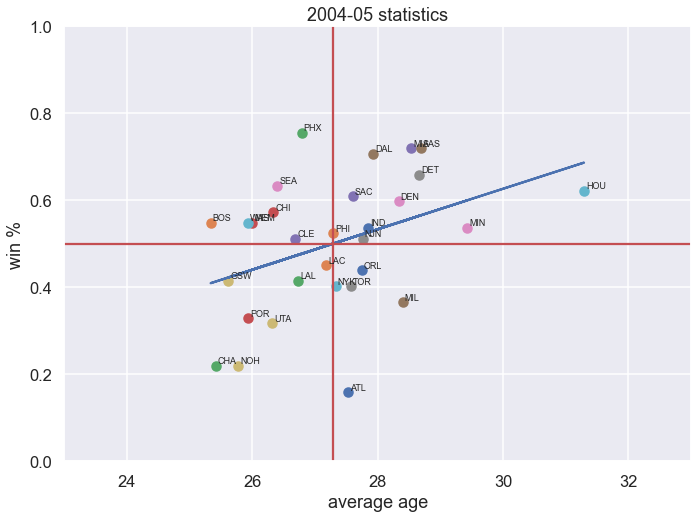

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


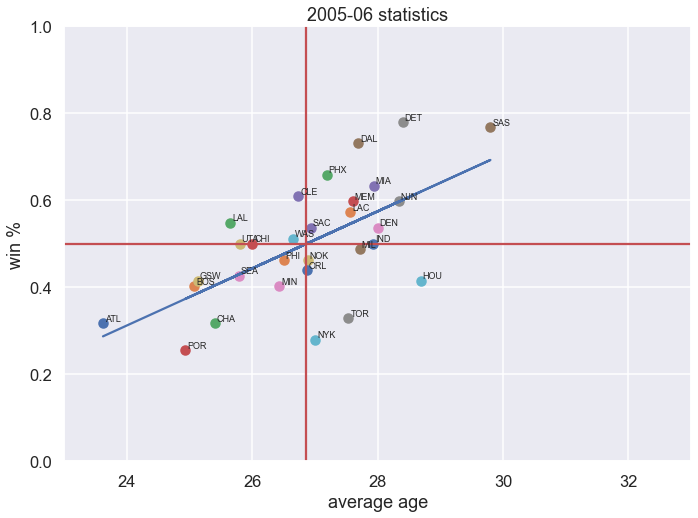

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


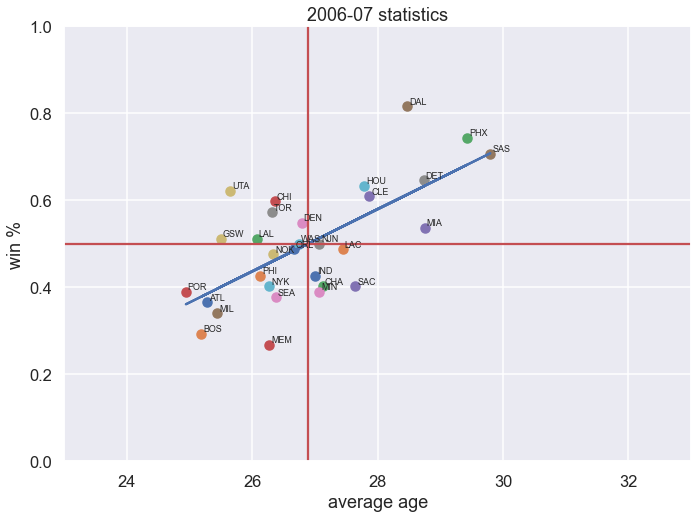

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


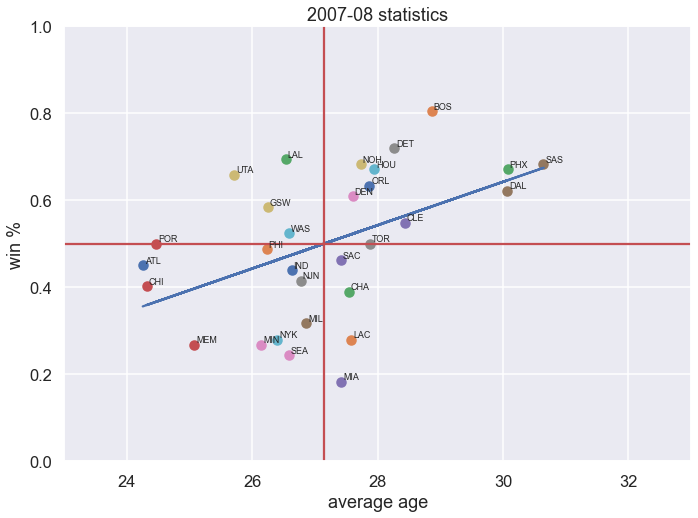

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


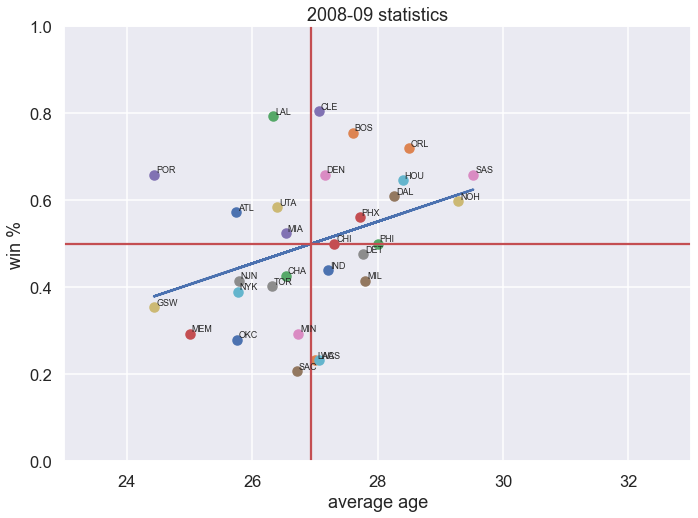

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


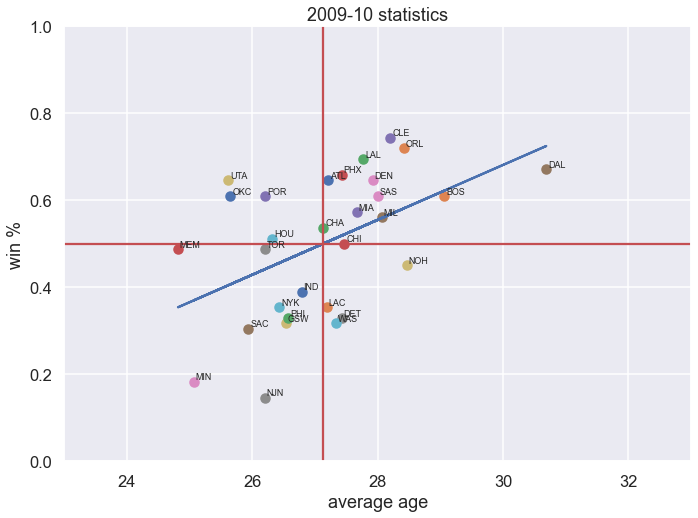

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


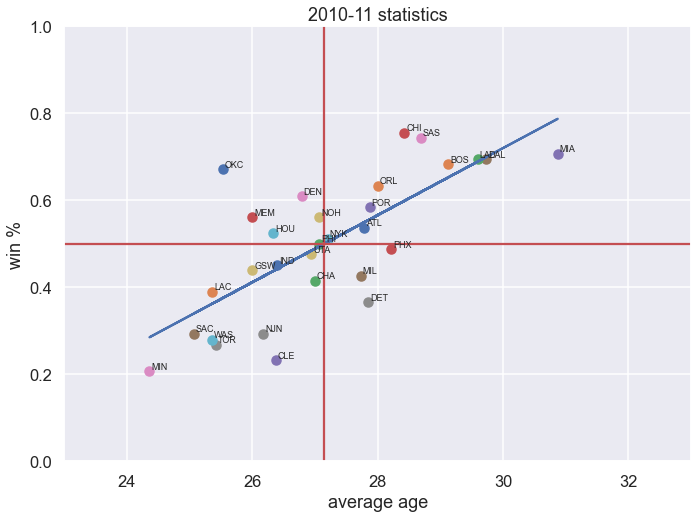

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


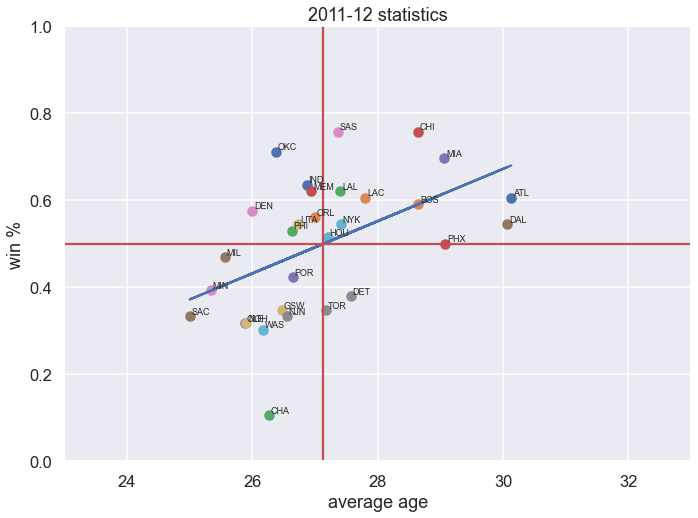

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


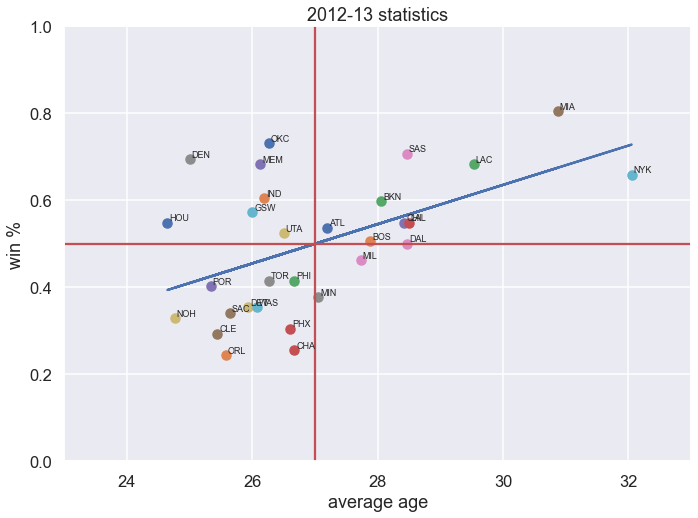

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


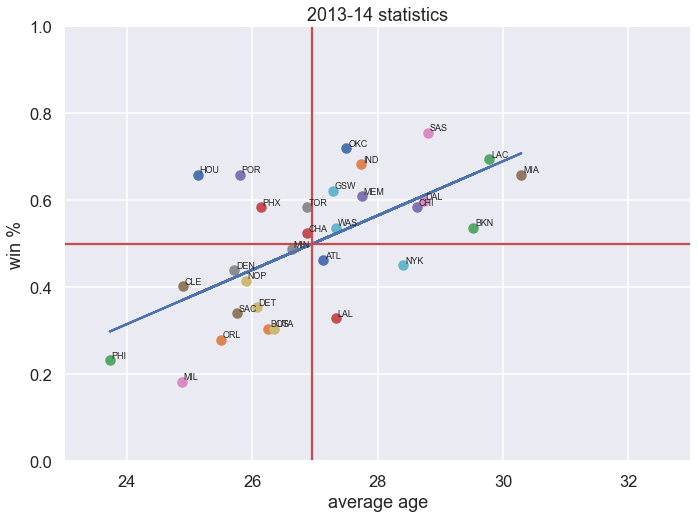

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


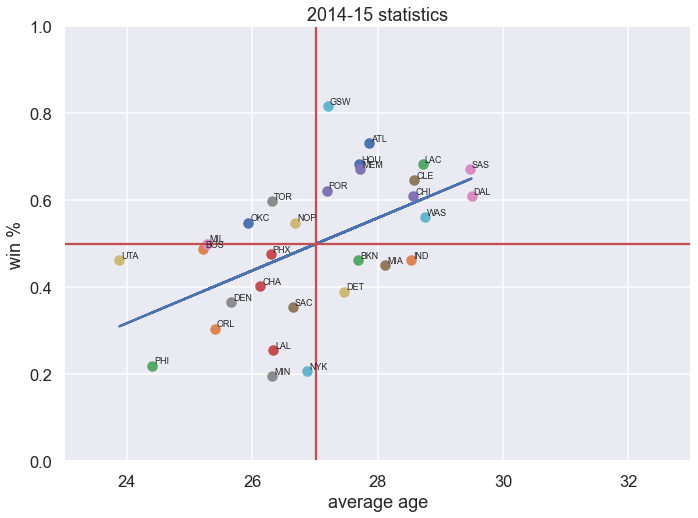

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


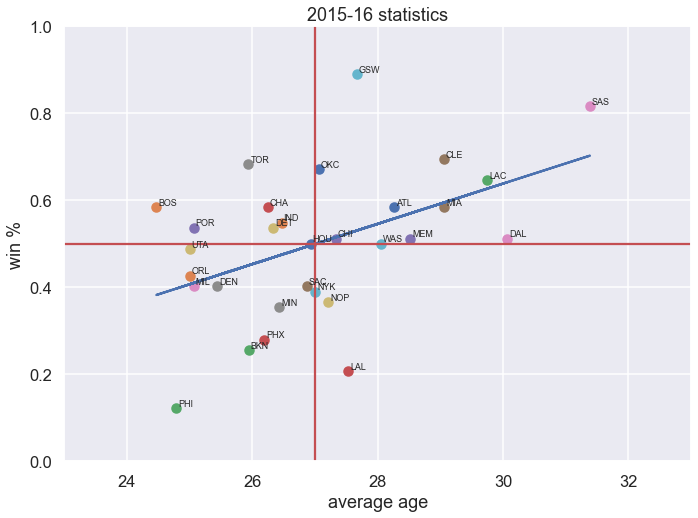

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


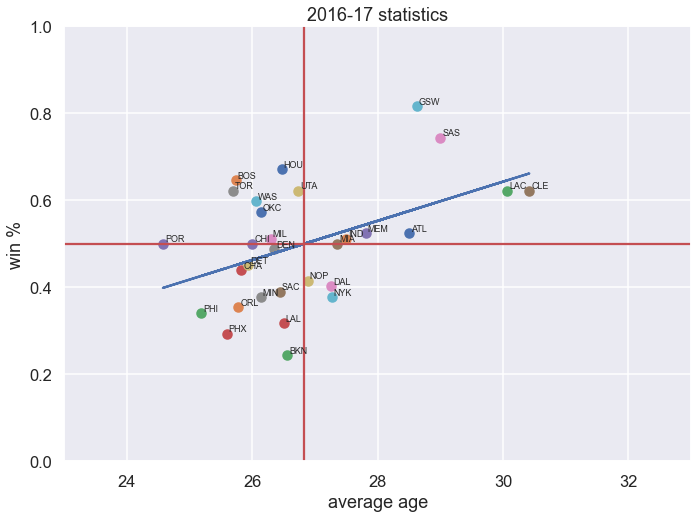

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


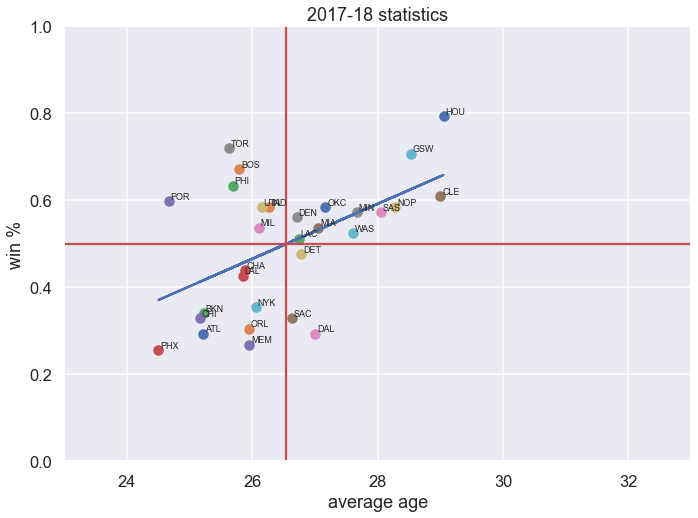

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


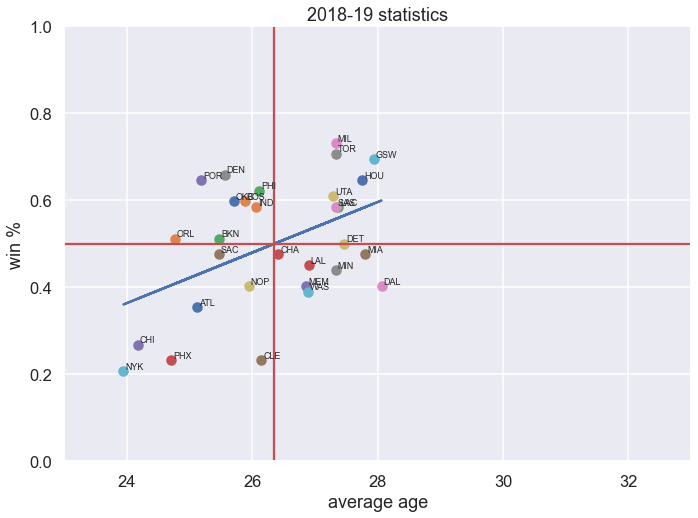

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


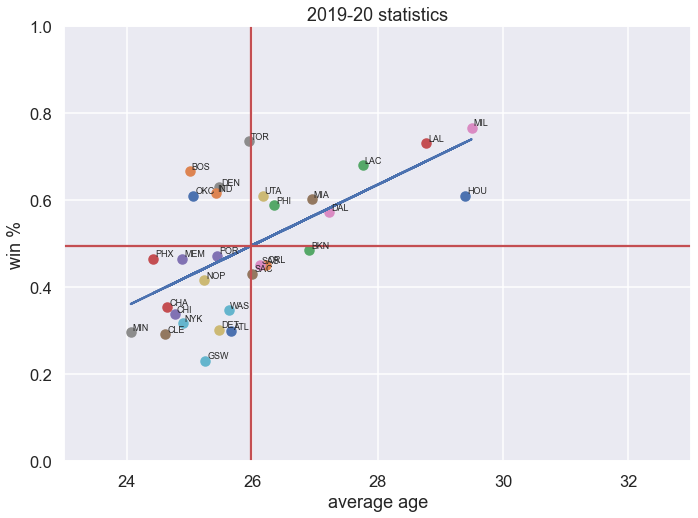

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


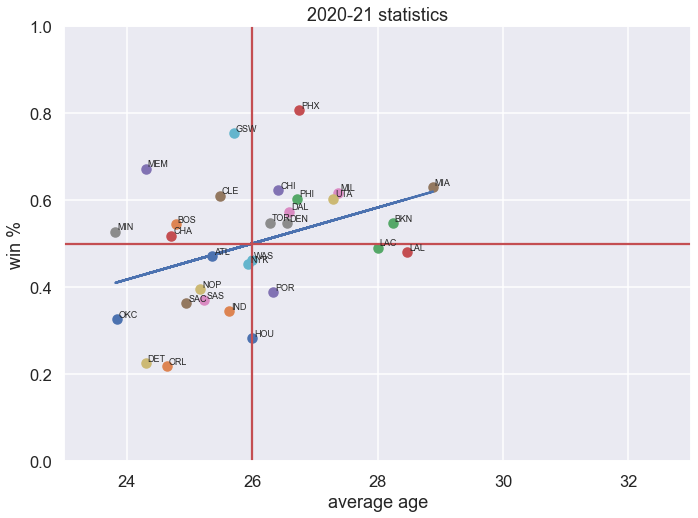

In [130]:
all_years = []
all_year_avg_age = []
for year in season_list:
    curr_year = []
    curr_year_win_percent = team_data_filtered[team_data_filtered['SEASON'] == year]['WIN%'].to_numpy()
    plt.figure(figsize=(10,8))
    plt.axis([23, 33, 0, 1])
    plt.xlabel("average age")
    plt.ylabel("win %")
    plt.title(year + " statistics")
    for team in team_abbreviations:
        curr_year_player_data = player_data_filtered[player_data_filtered['season'] == year]
        curr_year_player_data = curr_year_player_data[curr_year_player_data['team_abbreviation'] == team]
        average_age = np.average(curr_year_player_data['age'])
        if average_age > 0:
            curr_year.append(average_age)
            curr_win_percent = curr_year_win_percent[len(curr_year) - 1]
            plt.scatter(average_age, curr_win_percent)
            plt.text(average_age+.03, curr_win_percent+.005, team, fontsize=9)
    
    all_year_avg_age.append(curr_year[:])
    m, b = np.polyfit(curr_year, curr_year_win_percent, 1)
    year_avg = np.average(np.array(curr_year))
    plt.plot(curr_year, m * np.array(curr_year) + b)
    plt.axhline(y = np.average(np.array(curr_year_win_percent)), color = 'r', linestyle = '-')
    plt.axvline(x = year_avg, color = 'r', linestyle = '-')
    plt.show()
    curr_year = []
    all_years.append([year, m, year_avg])

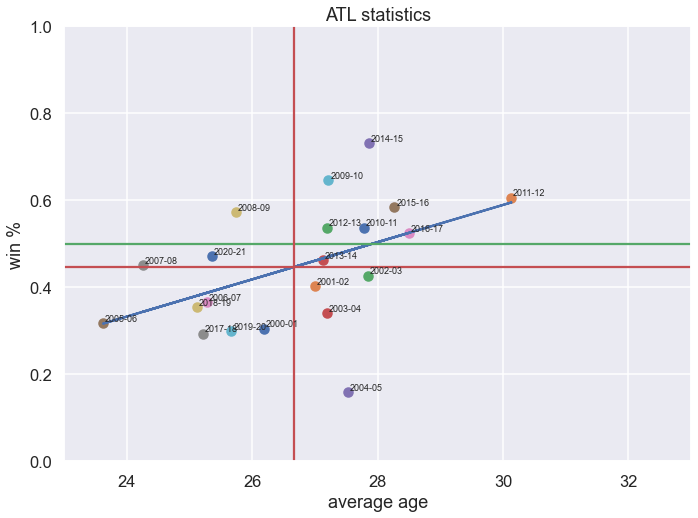

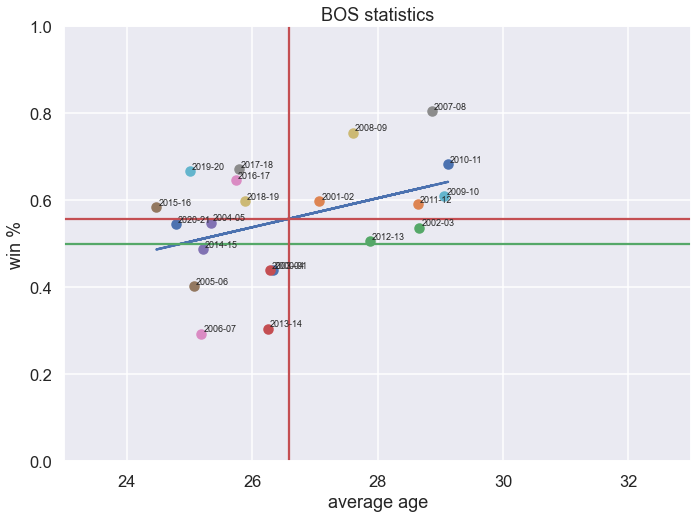

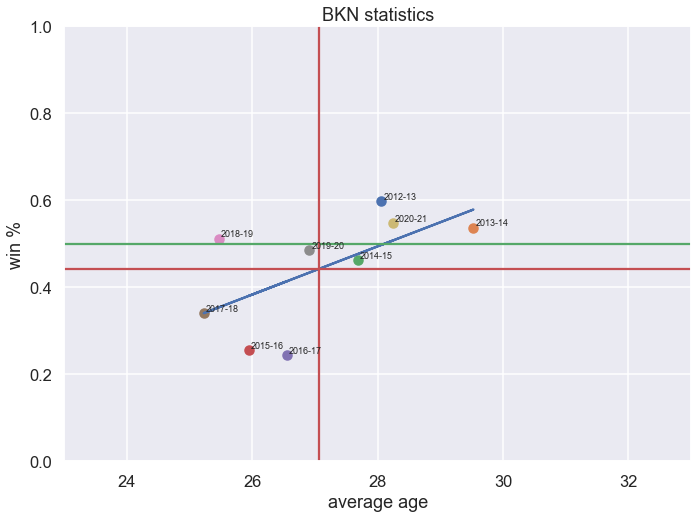

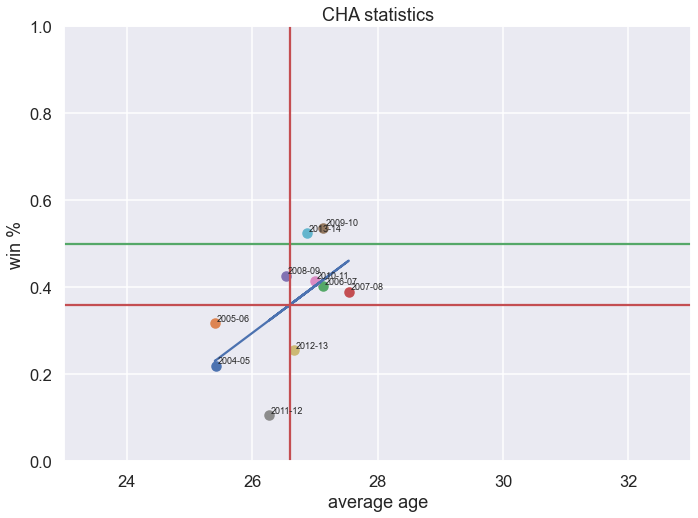

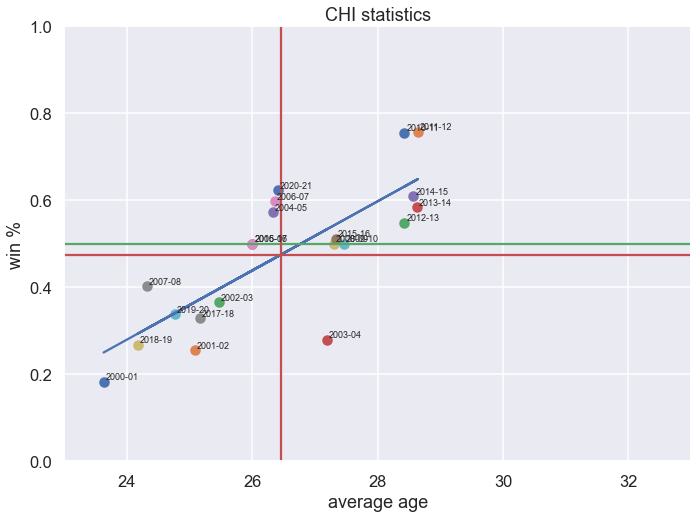

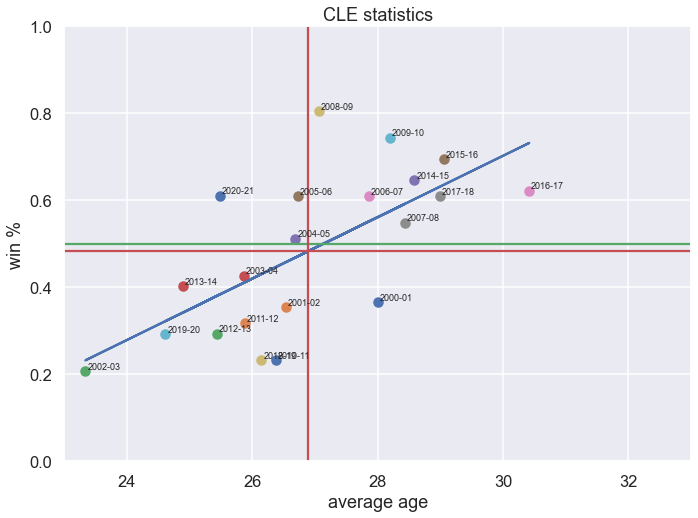

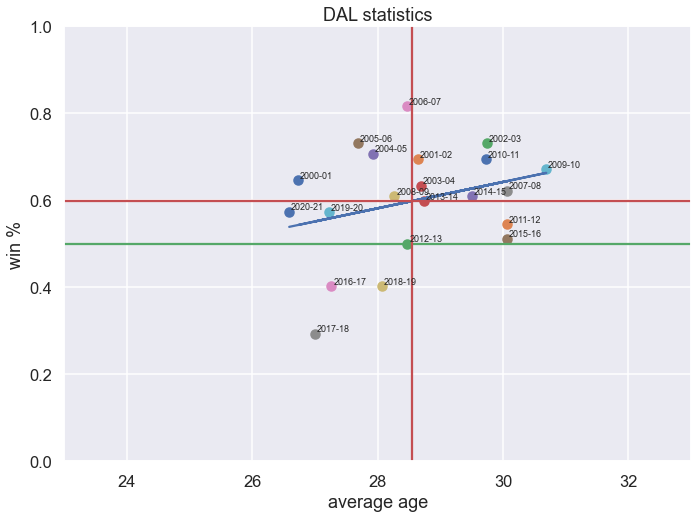

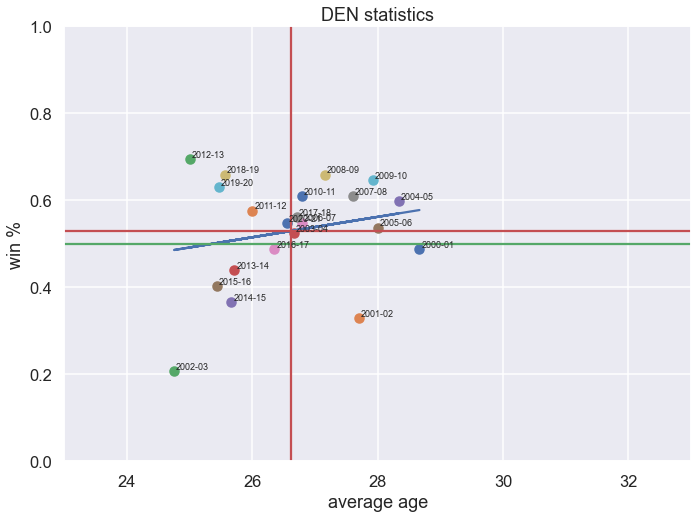

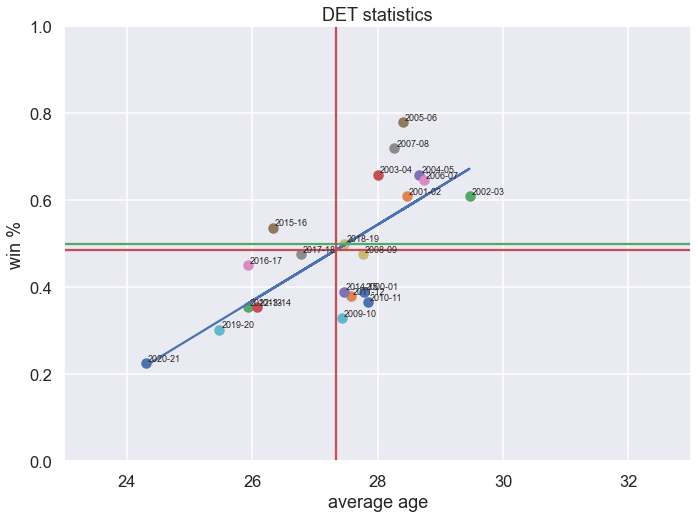

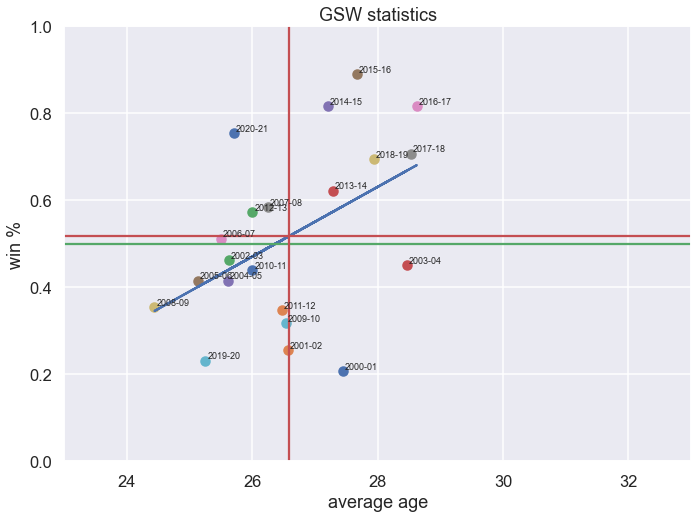

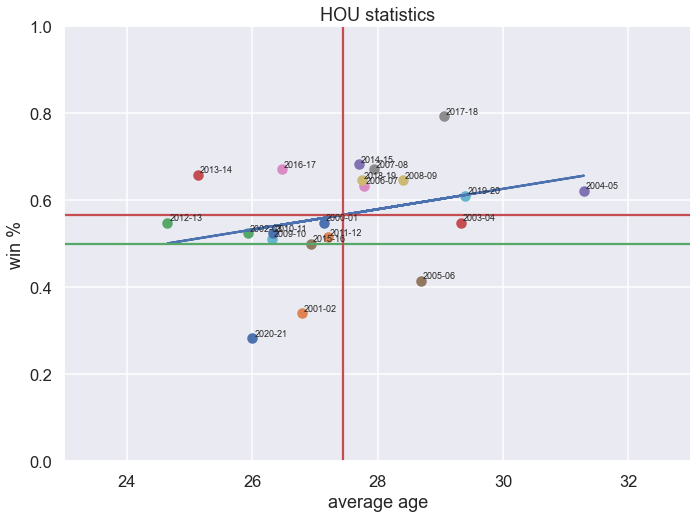

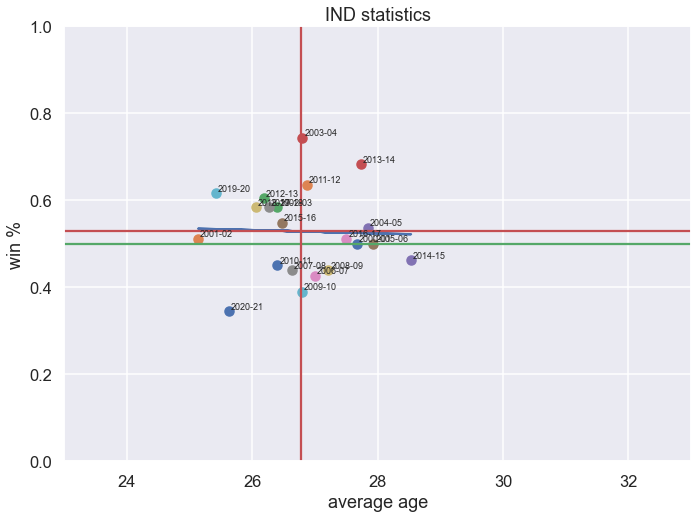

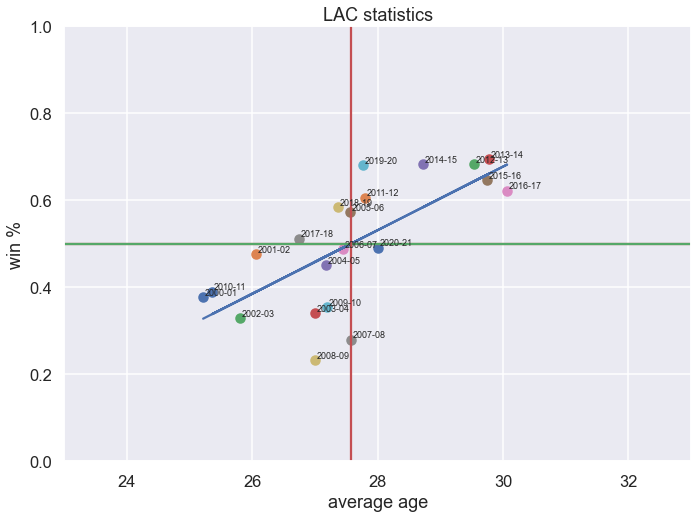

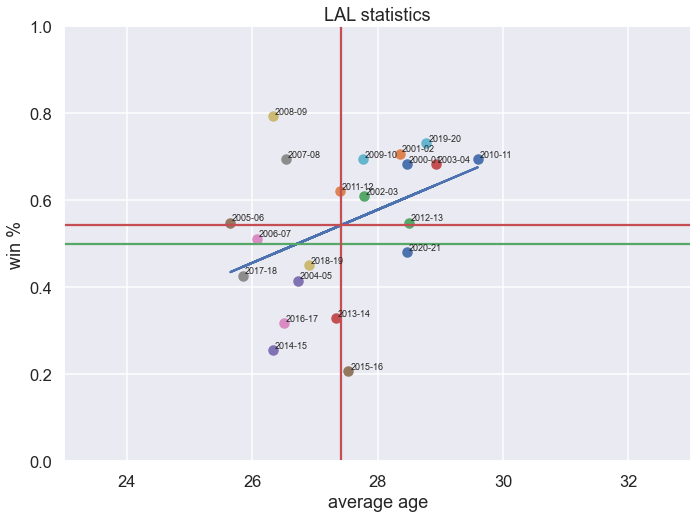

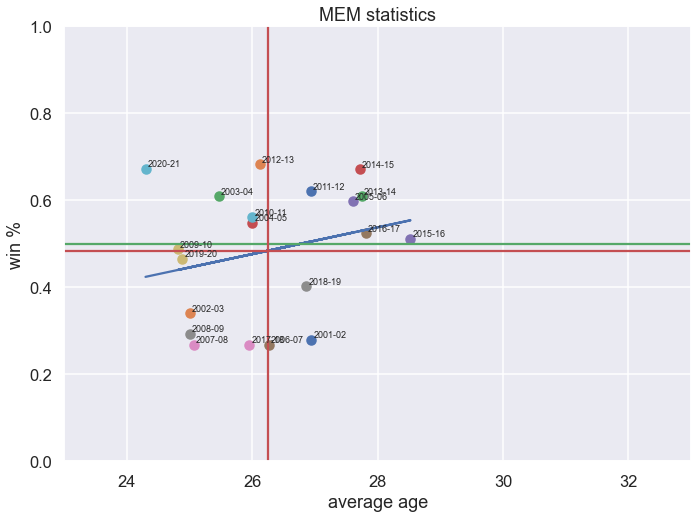

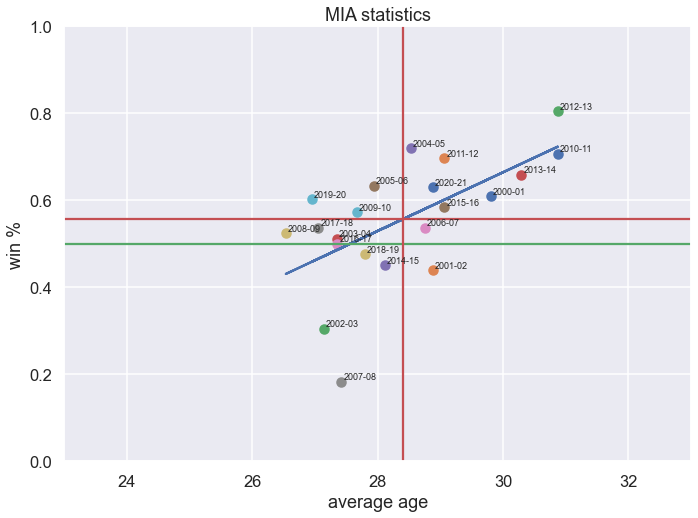

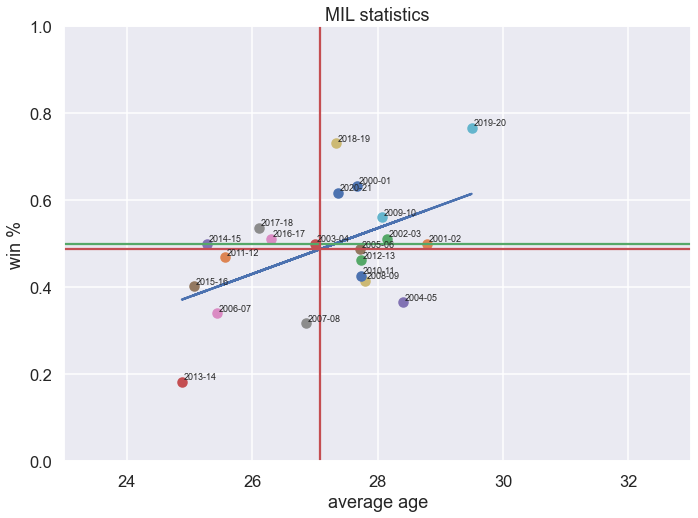

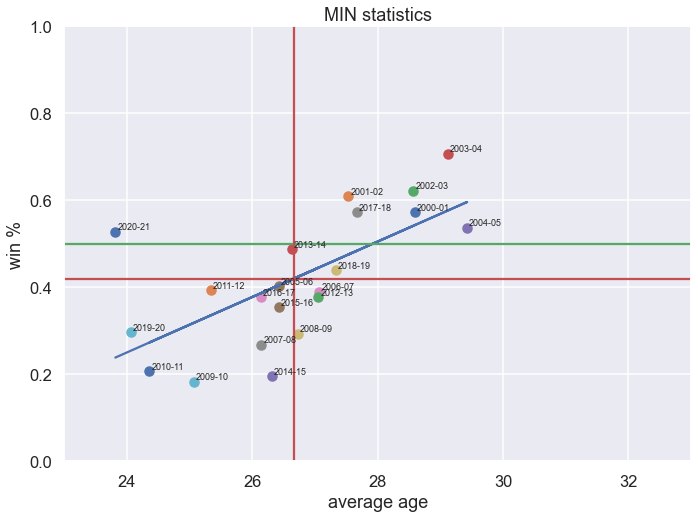

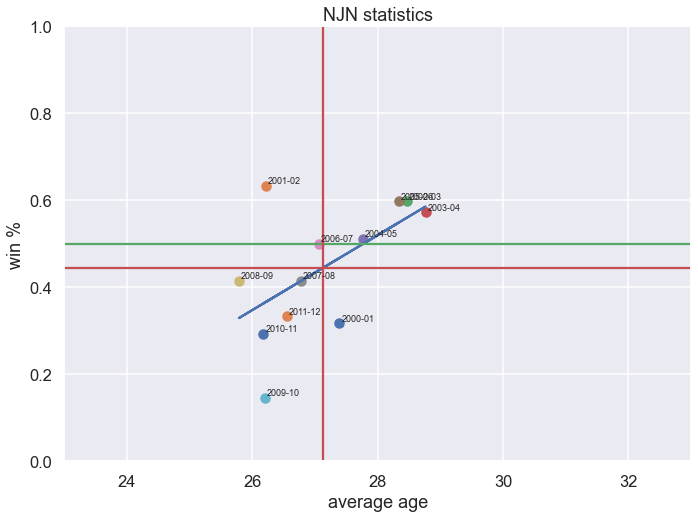

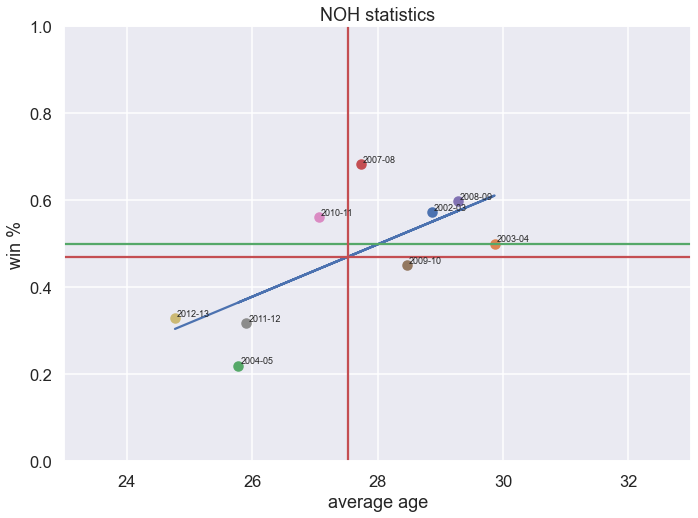

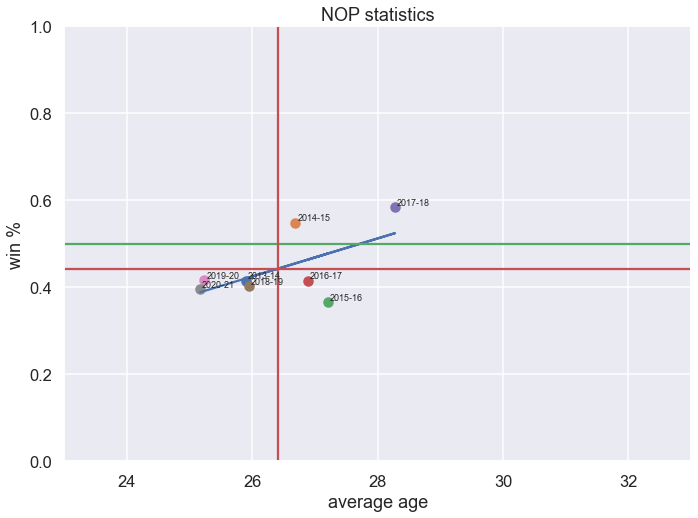

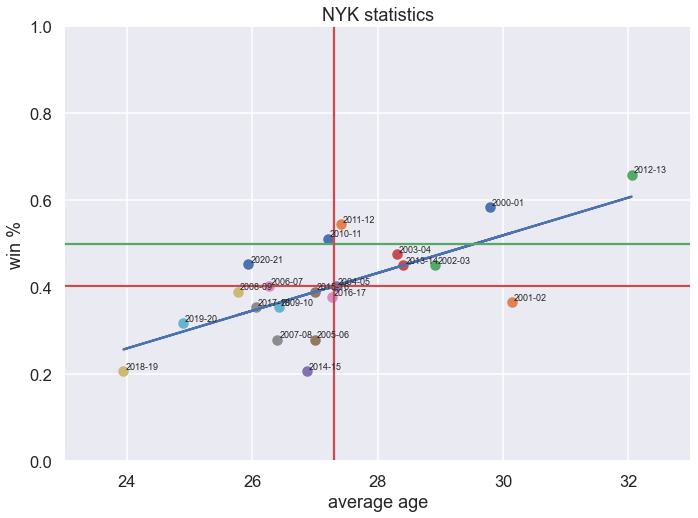

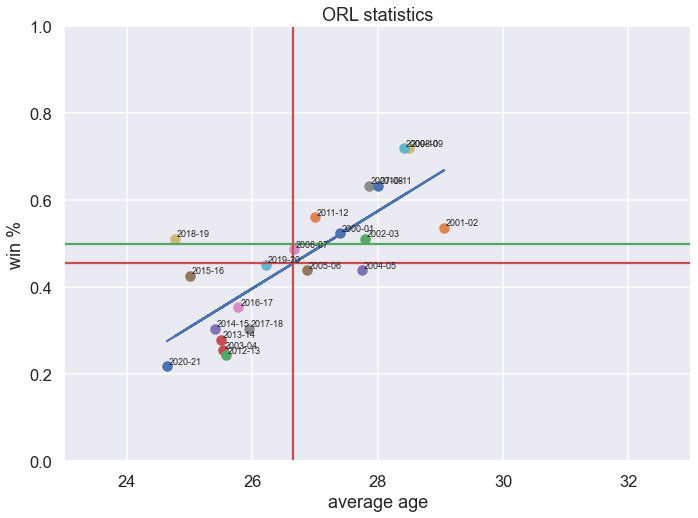

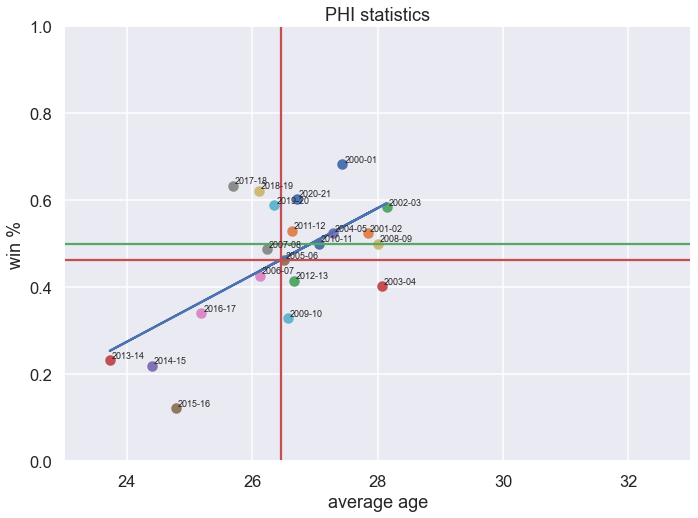

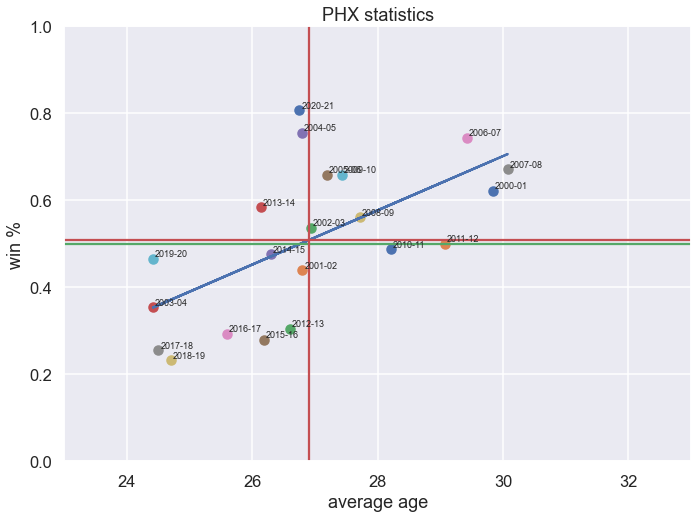

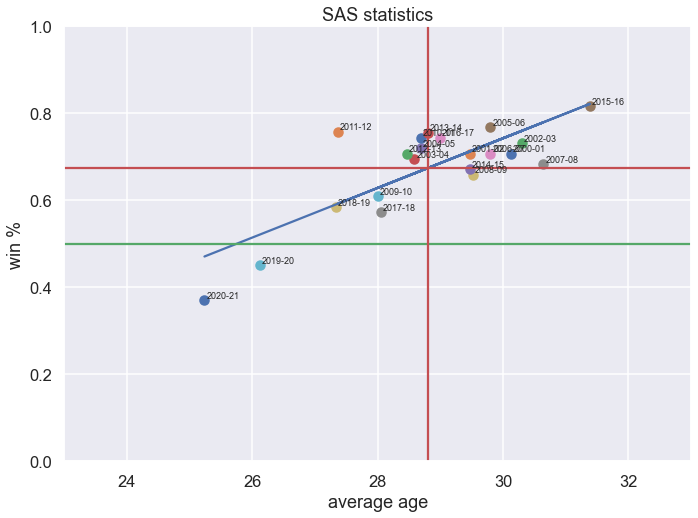

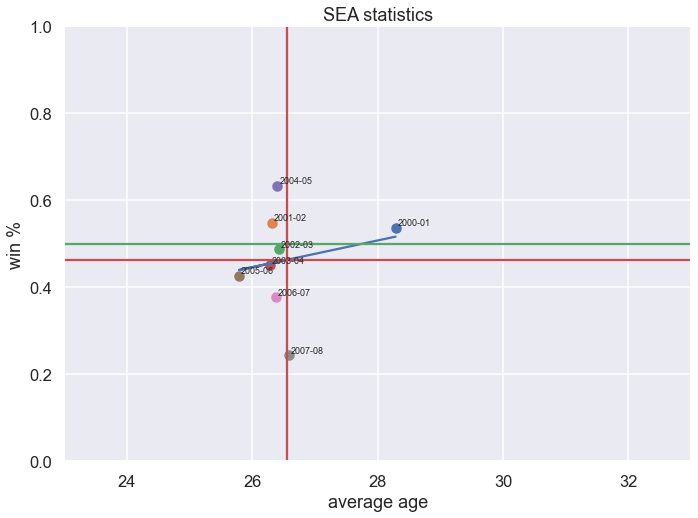

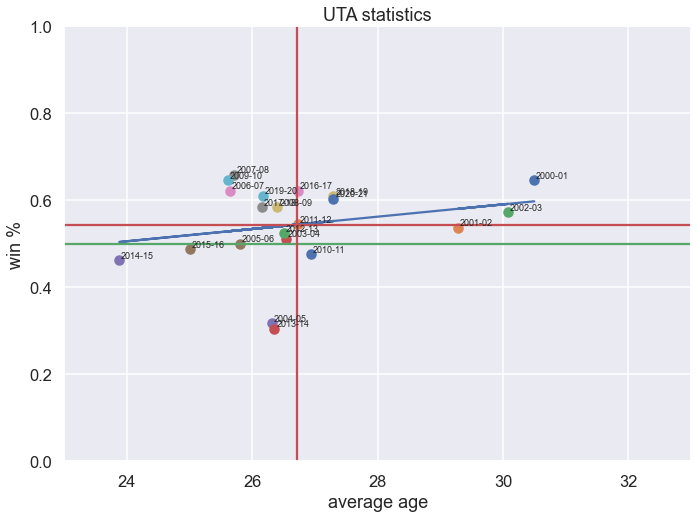

In [134]:
all_teams = []
for i in range(len(team_abbreviations)):
    curr_year = []
    team = team_abbreviations[i]
    if team in ["CHH", "VAN", "NOK"]:
        continue
    curr_team_data = team_data_filtered[team_data_filtered['TEAM'] == team_names[i]]
    plt.figure(figsize=(10,8))
    plt.axis([23, 33, 0, 1])
    plt.xlabel("average age")
    plt.ylabel("win %")
    plt.title(team + " statistics")
    for year in season_list:
        team_curr_win_percent = curr_team_data[curr_team_data["SEASON"] == year]['WIN%'].to_numpy()
        curr_year_win_percent = team_data_filtered[team_data_filtered['SEASON'] == year]['WIN%'].to_numpy()
        if len(team_curr_win_percent) > 0:
            team_curr_win_percent = team_curr_win_percent[0]
        else:
            continue
        curr_year_player_data = player_data_filtered[player_data_filtered['season'] == year]
        curr_year_player_data = curr_year_player_data[curr_year_player_data['team_abbreviation'] == team]
        #print(team, year)
        average_age = np.average(curr_year_player_data['age'])
        if team_curr_win_percent > 0:
            #print(year, average_age, team_curr_win_percent)
            curr_year.append(average_age)
            plt.scatter(average_age, team_curr_win_percent)
            plt.text(average_age+.03, team_curr_win_percent+.005, year, fontsize=9)
            
            
    all_team_win_percent = curr_team_data["WIN%"].to_numpy()
    year_avg = np.average(np.array(curr_year))
    #print(len(curr_year), len(all_team_win_percent))
    m, b = np.polyfit(curr_year, all_team_win_percent, 1)
    plt.plot(curr_year, m * np.array(curr_year) + b)
    plt.axhline(y = np.average(all_team_win_percent), color = 'r', linestyle = '-')
    plt.axhline(y = np.average(np.array(curr_year_win_percent)), color = 'g', linestyle = '-')
    plt.axvline(x = year_avg, color = 'r', linestyle = '-')
    plt.show()
    curr_year = []
    all_teams.append([team, m, year_avg])

In [137]:
def sort_list(lst):
    return(sorted(lst, key = lambda x: x[1])) 

In [138]:
all_teams = sort_list(all_teams)
all_years = sort_list(all_years)

In [139]:
all_teams

[['TOR', -0.02533644441156932, 26.95098928460273],
 ['IND', -0.0037854554823482933, 26.783864686225364],
 ['UTA', 0.01412404679083485, 26.710194590656773],
 ['POR', 0.019435542520301854, 26.225233183691827],
 ['WAS', 0.023305416704194292, 26.821194618198156],
 ['HOU', 0.023430205539707764, 27.439104238186502],
 ['DEN', 0.023456307612084115, 26.610946472606138],
 ['DAL', 0.030252681057419555, 28.55444689796746],
 ['SEA', 0.030719975351876604, 26.557681197478992],
 ['MEM', 0.030748651680552554, 26.251097901281724],
 ['BOS', 0.03341192703404238, 26.583032716010383],
 ['ATL', 0.04273975671662281, 26.669110448947908],
 ['NYK', 0.043311393949088464, 27.3046844873802],
 ['NOP', 0.04366985092433168, 26.41200389146887],
 ['MIL', 0.052586256538077664, 27.082058824429456],
 ['BKN', 0.05536307440372364, 27.068051547218214],
 ['SAS', 0.057039552976525125, 28.80365597881078],
 ['NOH', 0.06009218403809667, 27.525314627275414],
 ['LAL', 0.061021100269174226, 27.420425777148473],
 ['PHX', 0.06230642438

In [140]:
all_years

[['2001-02', 0.039986069645356136, 27.663391588661156],
 ['2020-21', 0.041348369690172505, 25.989734734935972],
 ['2016-17', 0.04500199153527163, 26.822092731829574],
 ['2012-13', 0.04511409820330938, 26.997491051976347],
 ['2015-16', 0.04628902641385342, 27.005016687961735],
 ['2004-05', 0.046512409742584866, 27.27995998826881],
 ['2003-04', 0.04735596209214026, 27.444092487616295],
 ['2008-09', 0.04819266077267082, 26.93744088256085],
 ['2007-08', 0.049803230758237976, 27.13725131078072],
 ['2000-01', 0.05222771766185382, 28.125120521241218],
 ['2018-19', 0.05802224837579157, 26.343101727134236],
 ['2011-12', 0.060042072486633555, 27.128897304106275],
 ['2014-15', 0.06044958796059021, 27.01491668304749],
 ['2013-14', 0.06239644501464606, 26.95545092305928],
 ['2002-03', 0.062960080529936, 27.531644457075494],
 ['2009-10', 0.06308032652605694, 27.125255063563895],
 ['2017-18', 0.06319434648240212, 26.543424164987634],
 ['2005-06', 0.06558032988766578, 26.858421317244844],
 ['2019-20',

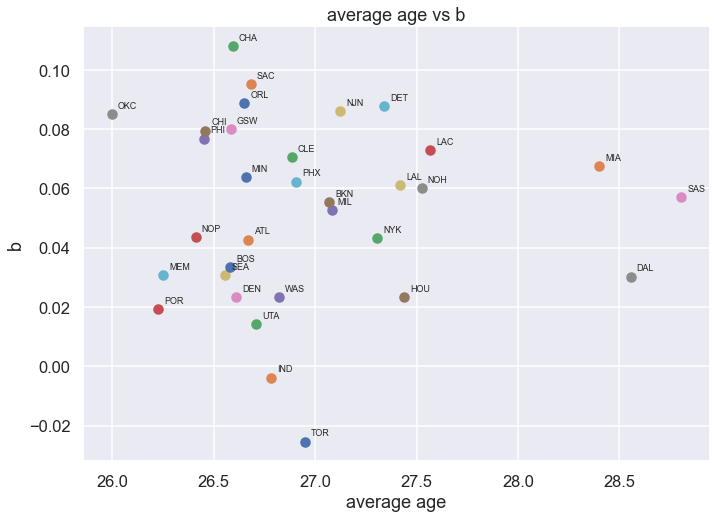

In [145]:
plt.figure(figsize=(10,8))
plt.xlabel("average age")
plt.ylabel("b")
plt.title("average age vs b")
for i in range(len(all_teams)):
    plt.scatter(all_teams[i][2], all_teams[i][1])
    plt.text(all_teams[i][2]+.03, all_teams[i][1]+.002, all_teams[i][0], fontsize=9)
plt.show()

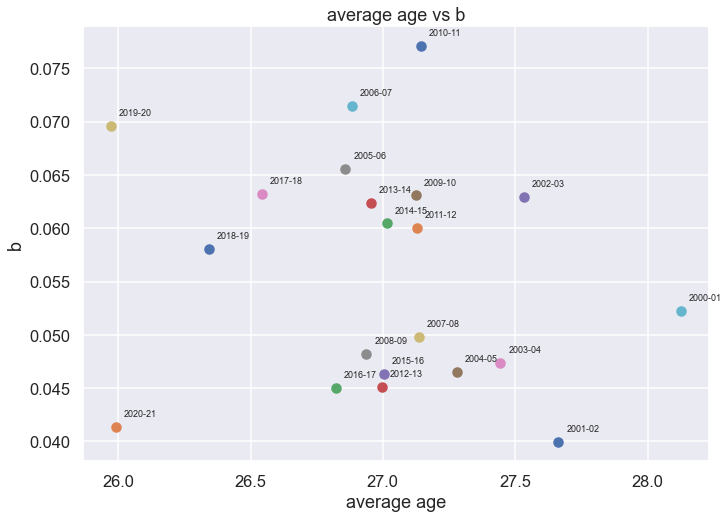

In [146]:
plt.figure(figsize=(10,8))
plt.xlabel("average age")
plt.ylabel("b")
plt.title("average age vs b")
for i in range(len(all_years)):
    plt.scatter(all_years[i][2], all_years[i][1])
    plt.text(all_years[i][2]+.03, all_years[i][1]+.001, all_years[i][0], fontsize=9)
plt.show()

In [147]:
from matplotlib.animation import FFMpegWriter

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


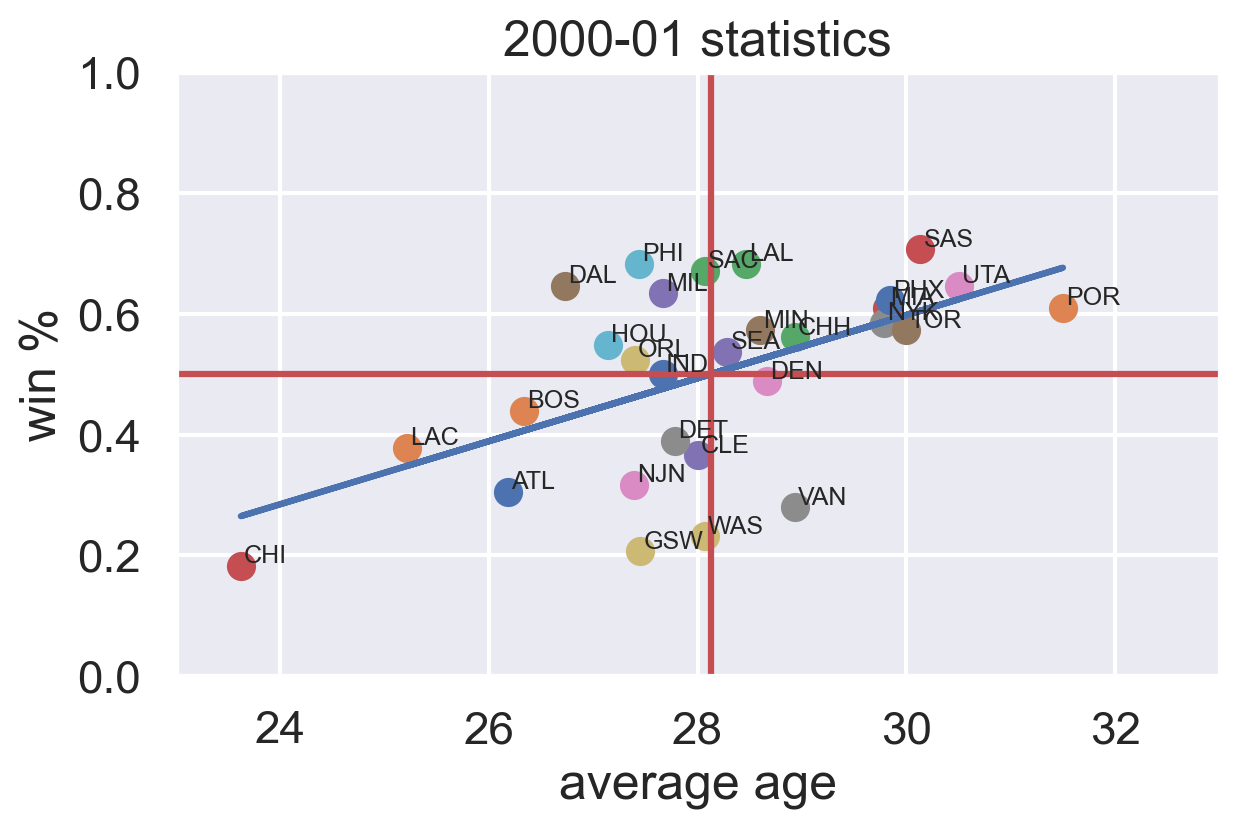

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/vikra1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 432x288 with 0 Axes>

In [170]:
metadata = dict(title='Age vs Win % Trend for last 21 years', artist='Matplotlib',comment='')
writer = FFMpegWriter(fps=3, metadata=metadata,bitrate=200000)
fig = plt.figure(dpi=200)
with writer.saving(fig, "animation1.mp4", dpi=200):
    for year in season_list:
        fig.clear()
        curr_year = []
        curr_year_win_percent = team_data_filtered[team_data_filtered['SEASON'] == year]['WIN%'].to_numpy()
        ax = fig.gca()
        fig.figsize = (15,13)
        ax.axis([23, 33, 0, 1])
        ax.set_xlabel("average age")
        ax.set_ylabel("win %")
        ax.set_title(year + " statistics")
        for team in team_abbreviations:
            curr_year_player_data = player_data_filtered[player_data_filtered['season'] == year]
            curr_year_player_data = curr_year_player_data[curr_year_player_data['team_abbreviation'] == team]
            average_age = np.average(curr_year_player_data['age'])
            if average_age > 0:
                curr_year.append(average_age)
                curr_win_percent = curr_year_win_percent[len(curr_year) - 1]
                ax.scatter(average_age, curr_win_percent)
                ax.text(average_age+.03, curr_win_percent+.005, team, fontsize=9)

        all_year_avg_age.append(curr_year[:])
        m, b = np.polyfit(curr_year, curr_year_win_percent, 1)
        year_avg = np.average(np.array(curr_year))
        ax.plot(curr_year, m * np.array(curr_year) + b)
        ax.axhline(y = np.average(np.array(curr_year_win_percent)), color = 'r', linestyle = '-')
        ax.axvline(x = year_avg, color = 'r', linestyle = '-')
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()
            

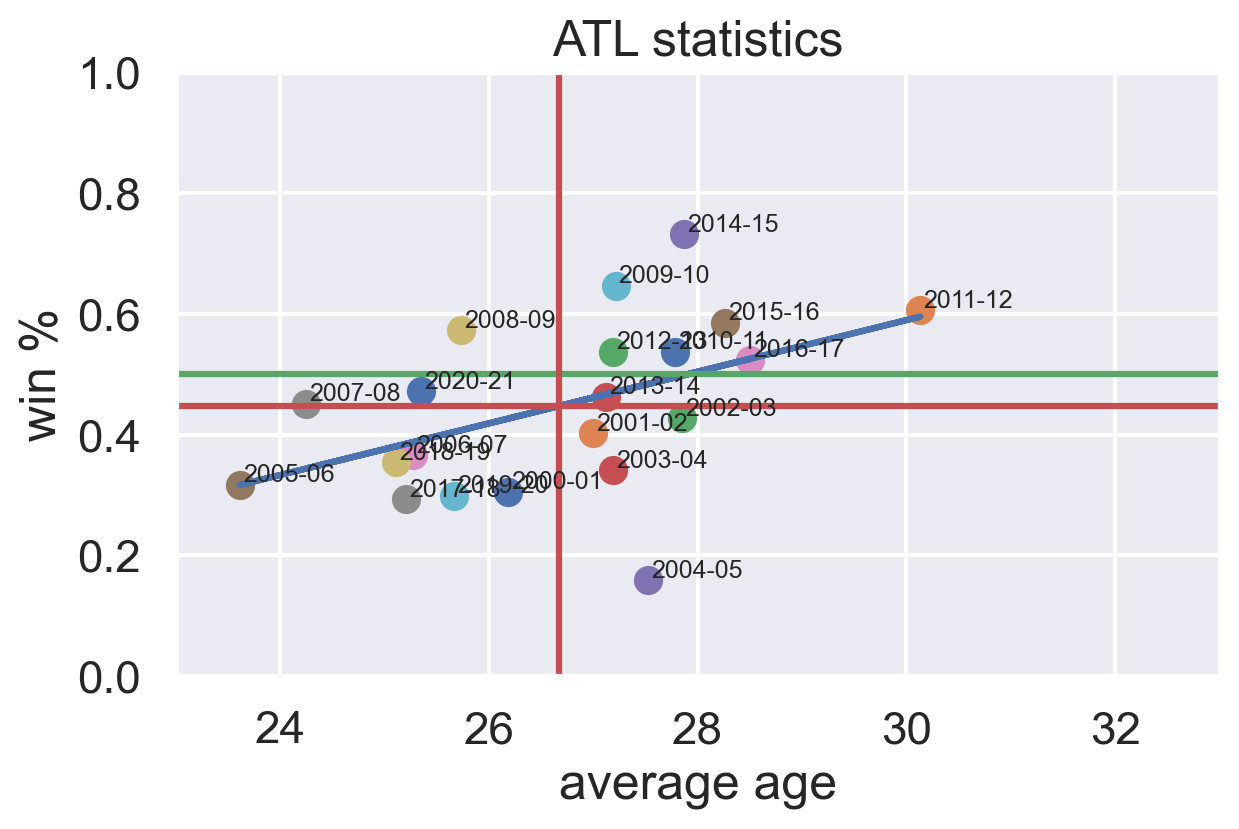

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [171]:
metadata = dict(title='Age vs Win % Trend for last 21 years', artist='Matplotlib',comment='')
writer = FFMpegWriter(fps=3, metadata=metadata,bitrate=200000)
fig = plt.figure(dpi=200)
with writer.saving(fig, "animation2.mp4", dpi=200):
        
        for i in range(len(team_abbreviations)):
            fig.clear()
            ax = fig.gca()
            curr_year = []
            team = team_abbreviations[i]
            if team in ["CHH", "VAN", "NOK"]:
                continue
            curr_team_data = team_data_filtered[team_data_filtered['TEAM'] == team_names[i]]
            fig.figsize = (15,13)
            ax.axis([23, 33, 0, 1])
            ax.set_xlabel("average age")
            ax.set_ylabel("win %")
            ax.set_title(team + " statistics")
            for year in season_list:
                team_curr_win_percent = curr_team_data[curr_team_data["SEASON"] == year]['WIN%'].to_numpy()
                curr_year_win_percent = team_data_filtered[team_data_filtered['SEASON'] == year]['WIN%'].to_numpy()
                if len(team_curr_win_percent) > 0:
                    team_curr_win_percent = team_curr_win_percent[0]
                else:
                    continue
                curr_year_player_data = player_data_filtered[player_data_filtered['season'] == year]
                curr_year_player_data = curr_year_player_data[curr_year_player_data['team_abbreviation'] == team]
                #print(team, year)
                average_age = np.average(curr_year_player_data['age'])
                if team_curr_win_percent > 0:
                    #print(year, average_age, team_curr_win_percent)
                    curr_year.append(average_age)
                    ax.scatter(average_age, team_curr_win_percent)
                    ax.text(average_age+.03, team_curr_win_percent+.005, year, fontsize=9)


            all_team_win_percent = curr_team_data["WIN%"].to_numpy()
            year_avg = np.average(np.array(curr_year))
            #print(len(curr_year), len(all_team_win_percent))
            m, b = np.polyfit(curr_year, all_team_win_percent, 1)
            ax.plot(curr_year, m * np.array(curr_year) + b)
            ax.axhline(y = np.average(all_team_win_percent), color = 'r', linestyle = '-')
            ax.axhline(y = np.average(np.array(curr_year_win_percent)), color = 'g', linestyle = '-')
            ax.axvline(x = year_avg, color = 'r', linestyle = '-')
            plt.draw()
            plt.pause(0.01)
            writer.grab_frame()
            